### Границы добавть, сдвиг добавить

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [64]:
name = 'b12_'
a = (210, 145, 725, 665)
b = (215, 150, 725, 665)
c = (255, 255, 255)

In [65]:
def save_image(image, filename):
    """Сохраняет изображение по указанному имени файла."""
    cv2.imwrite(filename, image)
    print(f"Изображение сохранено как {filename}")

In [66]:
def show(im):
    plt.axis('off')
    plt.imshow(im)


def draw_rectangle(image_path, coordinates, color):
    """
    Считывает изображение и закрашивает все снаружи указанного прямоугольника.

    :param image_path: Путь к изображению.
    :param coordinates: Кортеж из четырех значений (x1, y1, x2, y2) для координат рамки.
    :param color: Цвет закраски в формате (B, G, R).
    """
    # Считываем изображение
    image = cv2.imread(image_path)
    print(image.shape)
    
    # Проверяем, что изображение было загружено
    if image is None:
        print("Ошибка: изображение не найдено.")
        return
    
    # Создаем маску для закрашивания
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.rectangle(mask, (coordinates[0], coordinates[1]), (coordinates[2], coordinates[3]), 255, -1)
    
    # Закрашиваем все снаружи указанного прямоугольника
    image[mask == 0] = color

    save_image(image, f'pics/{name}.png')
    
    # Показываем изображение
    show(image)

In [67]:
# Пример использования
# draw_rectangle(f'pics/process/{name}.jpg', (215, 150, 725, 600), (0, 0, 0))  # Рамка белого цвета

Изображение сохранено как pics/test2/bordered.png


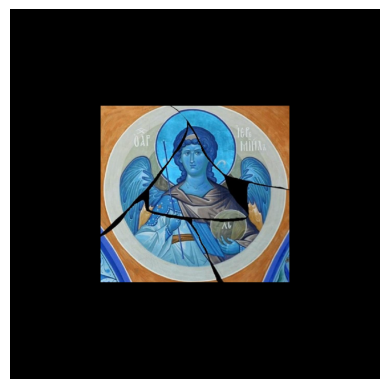

In [ ]:
def add_sqare_border(image_path, border_size, color):
    """
    Добавляет рамку к изображению так, чтобы итоговое изображение стало квадратным, 
    а ширина рамки была не менее border_size.

    :param image_path: Путь к изображению.
    :param border_size: Минимальный размер рамки.
    :param color: Цвет рамки в формате (B, G, R).
    """
    image = cv2.imread(image_path)

    if image is None:
        print("Ошибка: изображение не найдено.")
        return

    height, width = image.shape[:2]

    # Определяем, сколько нужно добавить, чтобы сделать изображение квадратным
    if height > width:
        diff = height - width
        left = diff // 2
        right = diff - left
        top = bottom = 0
    else:
        diff = width - height
        top = diff // 2
        bottom = diff - top
        left = right = 0

    # Добавляем отступы, чтобы сделать изображение квадратным
    squared_image = cv2.copyMakeBorder(
        image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color
    )

    # Затем добавляем рамку
    final_image = cv2.copyMakeBorder(
        squared_image,
        border_size, border_size, border_size, border_size,
        cv2.BORDER_CONSTANT,
        value=color
    )

    # save_image(final_image, f'pics/test1/bordered.png')
    save_image(final_image, f'pics/test2/bordered.png')

    show(final_image)


# (255, 255, 255) white
# (0, 0, 0) black

# add_sqare_border(f'pics/test1/cutted.jpg', 300, (0, 0, 0))  
add_sqare_border(f'pics/test2/cutted.jpg', 350, (0, 0, 0)) 


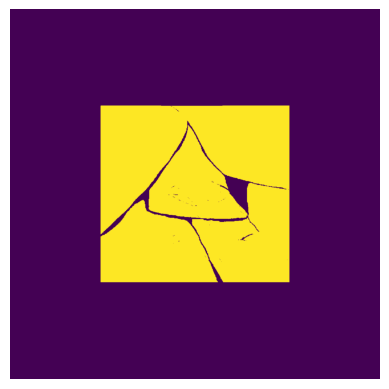

In [69]:
import cv2
import numpy as np

# Загрузка изображения
# image = cv2.imread('pics/test1/bordered.png')
image = cv2.imread('pics/test2/bordered.png')

# Перевод в HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Диапазон чёрного
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])

# Создание маски: чёрное — 255, остальное — 0
black_mask = cv2.inRange(hsv, lower_black, upper_black)

# Инвертируем: чёрные части станут 0, остальные 255
mask = cv2.bitwise_not(black_mask)

# Сохраняем 
# cv2.imwrite("pics/test1/mask.png", mask)
cv2.imwrite("pics/test2/mask.png", mask)

show(mask)

Изображение сохранено как pics/shifted_2_.png


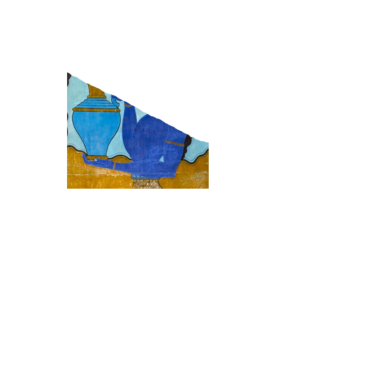

In [ ]:
name = '2_'
def shift_image(image_path, shift_x, shift_y):
    """
    Смещает изображение на указанные координаты.

    :param image_path: Путь к изображению.
    :param shift_x: Смещение по оси X.
    :param shift_y: Смещение по оси Y.
    """
    # Считываем изображение
    image = cv2.imread(image_path)
    
    # Проверяем, что изображение было загружено
    if image is None:
        print("Ошибка: изображение не найдено.")
        return
    
    # Получаем размеры изображения
    h, w, _ = image.shape
    
    # Создаем пустое изображение с белым фоном
    shifted_image = np.ones_like(image) * 255
    
    # Смещаем изображение
    shifted_image[max(0, shift_y):min(h, h + shift_y), max(0, shift_x):min(w, w + shift_x)] = image[max(0, -shift_y):min(h, h - shift_y), max(0, -shift_x):min(w, w - shift_x)]
    
    save_image(shifted_image, f'pics/shifted_{name}.png')
    
    # Показываем смещенное изображение
    show(shifted_image)

shift_image(f'pics/bordered_{name}.png', -150, -200)  # Смещение изображения 
